# **Prediksi Harga Mobil Bekas (Used Car)**

* Nama : Annisa Dewiyanti
* ID Dicoding : andwynt
* Dataset: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes
* Domain : bisnis otomotif

# Business Understanding

Pasar mobil bekas merupakan salah satu sektor industri otomotif yang terus berkembang, terutama karena faktor harga yang lebih terjangkau dibanding mobil baru. Dealer mobil, perusahaan pembiayaan, serta platform online penjualan mobil membutuhkan pemahaman yang baik terhadap faktor-faktor apa saja yang mempengaruhi harga jual mobil bekas agar dapat mengambil keputusan yang lebih akurat, seperti penetapan harga jual, prediksi permintaan, hingga strategi pemasaran.

Dataset ini berisi data mobil bekas dengan merek **Toyota** , termasuk informasi seperti model, tahun, jenis bahan bakar, transmisi, jarak tempuh, dan harga jual. Informasi ini sangat relevan untuk menganalisis faktor-faktor yang memengaruhi harga mobil bekas dan mengembangkan model prediksi harga.

# 1. Data Understanding

#### Setup Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
!pip install gdown

#### Loading dataset

In [3]:
# download dataset dari google drive https://drive.google.com/file/d/1Y5mDD3dyIbgCynfRKL4l5WtRdtLhuyyn/view?usp=drive_link
!gdown --id 1Y5mDD3dyIbgCynfRKL4l5WtRdtLhuyyn

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Y5mDD3dyIbgCynfRKL4l5WtRdtLhuyyn
To: /content/toyota.csv
100% 348k/348k [00:00<00:00, 102MB/s]


#### Menampilkan Isi Dataset

In [4]:
car = pd.read_csv('toyota.csv')
car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


Pada dataset Toyota.csv terdapat variabel:

* model -> macam-macam series pada mobil Toyota.
* year -> tahun model mobil diproduksi.
* price -> harga mobil (satuan dollar / $).
* transmission -> transmission pada. mobil (Automatic, Manual, Semi-Auto)
* mileage -> jarak tempuh yang dapat dilalui mobil.
* fuelType -> tipe bahan bakar mobil (Petrol, Diesel, Hybrid, Electric, dll).
* tax -> pajak tahunan.
* mpg -> efesiensi bahan bakar.
* engineSize -> kapasistas mesin pada mobil.

In [6]:
car.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


terdapat 6 data **numerik** yakni: year, price, mileage, tax, mpg, dan engineSize lalu 3 data **kategoris** yakni: model, transmission, dan fuelType.

#### Menangani Missing Values

In [7]:
car.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [9]:
mileage =(car.mileage == 0).sum()
mpg =(car.mpg == 0).sum()
engineSize =(car.engineSize == 0).sum()


print('jumlah nilai 0 pada kolom mileage : ', mileage)
print('jumlah nilai 0 pada kolom mpg : ', mpg)
print('jumlah nilai 0 pada kolom engineSize: ', engineSize)

jumlah nilai 0 pada kolom mileage :  0
jumlah nilai 0 pada kolom mpg :  0
jumlah nilai 0 pada kolom engineSize:  6


Setelah dilakukan pengecekan terdapat 6 data yang bernilai 0 pada engineSize. Selanjutnya, mengecek jumlah cek apakah data bernilai 0 pada salah satu dimensi terdapat pada dimensi lain.

In [10]:
car.loc[car['engineSize']==0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2535,Yaris,2016,12300,Manual,6148,Hybrid,0,86.0,0.0
2545,Yaris,2016,11000,Automatic,39909,Hybrid,0,86.0,0.0
5126,Aygo,2019,9800,Manual,3635,Petrol,150,56.5,0.0
5233,Aygo,2019,8000,Manual,8531,Petrol,145,56.5,0.0
5257,Aygo,2019,8000,Manual,5354,Petrol,145,56.5,0.0
5960,C-HR,2017,14300,Manual,46571,Petrol,145,47.1,0.0


In [12]:
car = car.loc[(car[['mileage','tax','mpg','engineSize']]!=0).all(axis=1)]
car.shape

(4944, 9)

Kemudian, menghapus baris data pada kolom mileage, tax, mpg, engineSize yang bernilai 0.

In [13]:
car.describe()

,year,price,mileage,tax,mpg,engineSize
count,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000
mean,2017.149474,13204.217233,20276.212379,128.941141,58.918993,1.501274
std,2.317790,6806.206083,19381.921437,54.926950,15.952048,0.456611
min,1998.000000,850.000000,2.000000,10.000000,2.800000,1.000000
25%,2017.000000,8790.000000,7377.750000,135.000000,51.100000,1.000000
50%,2017.000000,10995.000000,14829.000000,145.000000,57.700000,1.500000
75%,2019.000000,16460.000000,27044.750000,145.000000,67.300000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


#### Menangani outliers

In [20]:
numeric = ['year','price','mileage','tax','mpg','engineSize']
categorical= ['model','transmission','fuelType']

* Visualisasi bloxplot untuk column tax

<Axes: xlabel='tax'>

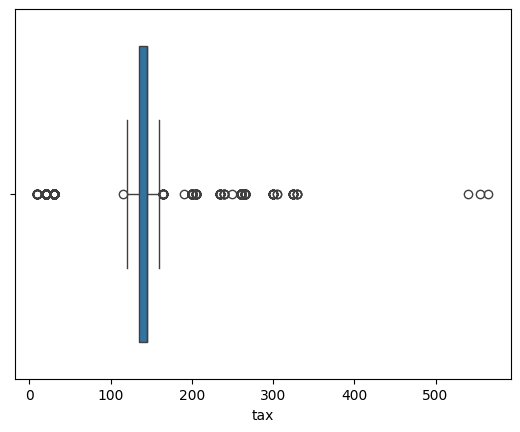

In [14]:
sns.boxplot(x=car['tax'])

* Visualisasi bloxplot untuk column mileage

<Axes: xlabel='mileage'>

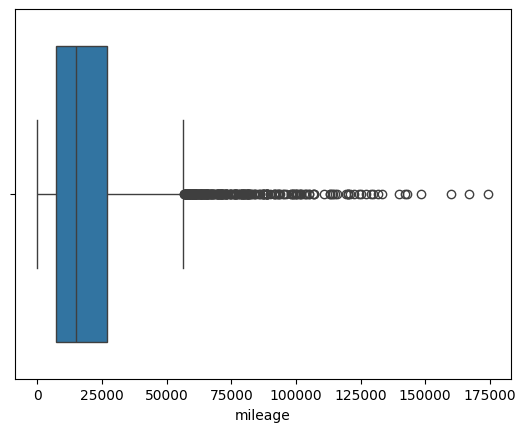

In [15]:
sns.boxplot(x=car['mileage'])

* Visualisasi bloxplot untuk column mpg

<Axes: xlabel='mpg'>

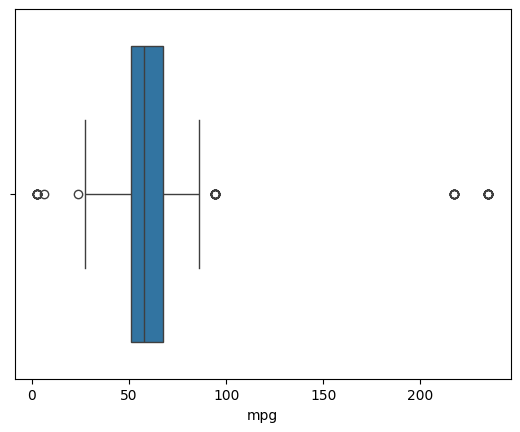

In [16]:
sns.boxplot(x=car['mpg'])

* Visualisasi bloxplot untuk column engineSize

<Axes: xlabel='engineSize'>

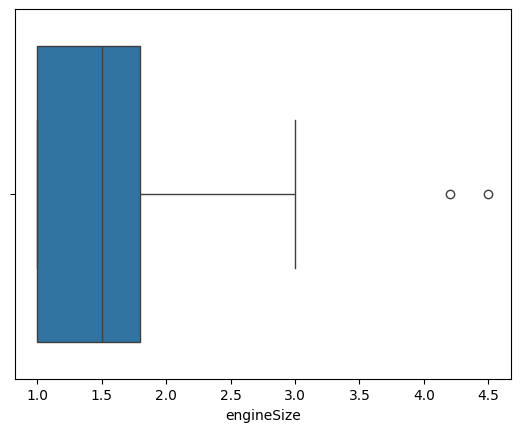

In [17]:
sns.boxplot(x=car['engineSize'])

In [19]:
# Select only numeric columns for outlier removal
numeric_cols = car.select_dtypes(include=np.number)

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3-Q1

# Filter outliers based on numeric columns
car = car[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

car.shape

(3434, 9)

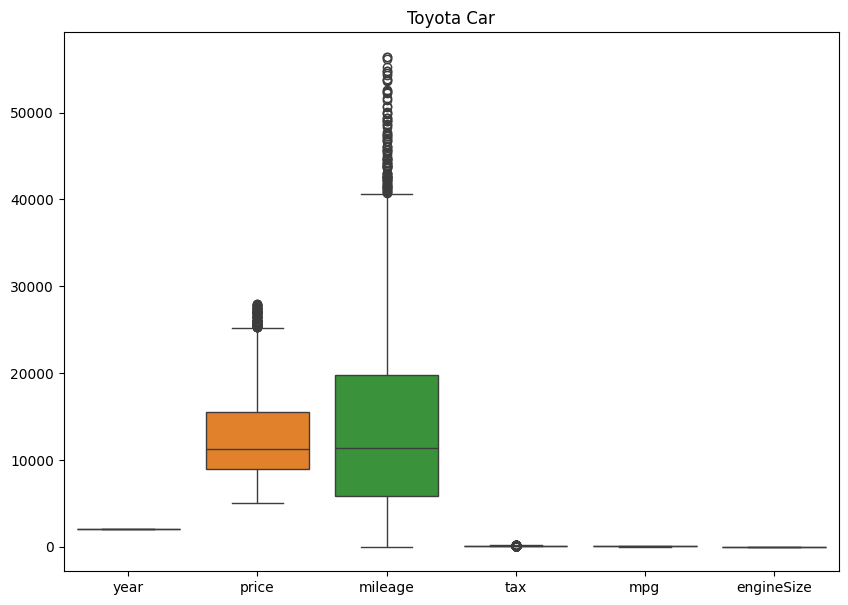

In [29]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=car).set_title("Toyota Car")
plt.show()

Penghapusan outlier telah membuat distribusi data, seperti price, mileage, tax, dan enginesize mobil Toyota, menjadi lebih fokus dan terpusat. Hal ini menghasilkan representasi yang lebih akurat mengenai karakteristik mayoritas data, memungkinkan analisis yang lebih relevan dan model statistik yang lebih robust, meskipun perlu diingat potensi kehilangan informasi dari kasus-kasus ekstrem.

# Exploratory Data Analysis

* Fitur Model

              jumlah sampel  persentase
model                                  
Aygo                   1221        35.6
Yaris                  1084        31.6
C-HR                    367        10.7
Corolla                 249         7.3
Auris                   181         5.3
RAV4                    145         4.2
Prius                    47         1.4
Avensis                  46         1.3
GT86                     44         1.3
Verso                    34         1.0
Camry                     9         0.3
PROACE VERSO              7         0.2


<Axes: title={'center': 'model'}, xlabel='model'>

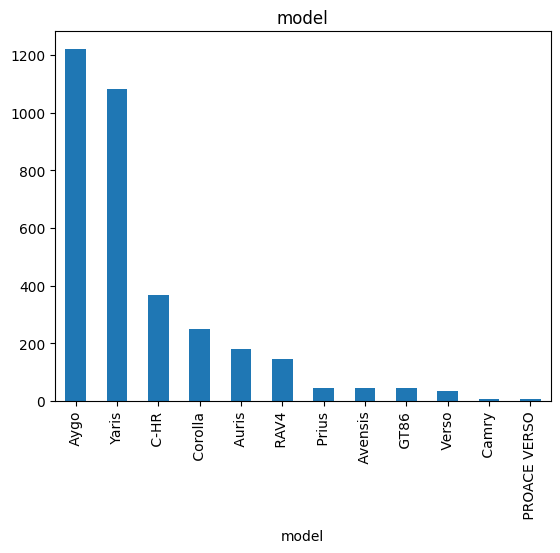

In [22]:
feature = categorical[0]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

* Fitur Transmission

              jumlah sampel  persentase
transmission                           
Manual                 2253        65.6
Automatic              1051        30.6
Semi-Auto               130         3.8


<Axes: title={'center': 'transmission'}, xlabel='transmission'>

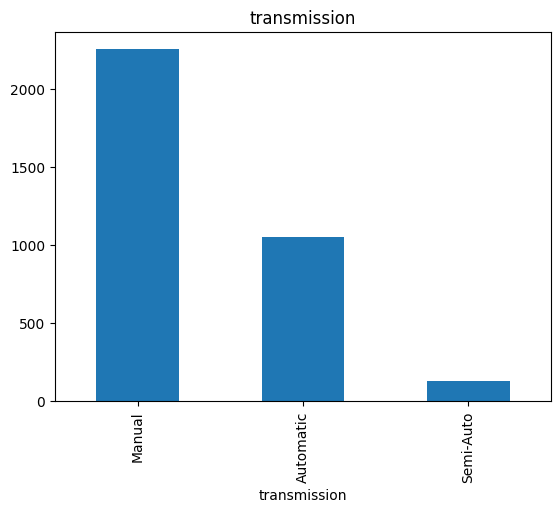

In [23]:
feature = categorical[1]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

* Fitur Engine Type


          jumlah sampel  persentase
fuelType                           
Petrol             2478        72.2
Hybrid              770        22.4
Diesel              129         3.8
Other                57         1.7


<Axes: title={'center': 'fuelType'}, xlabel='fuelType'>

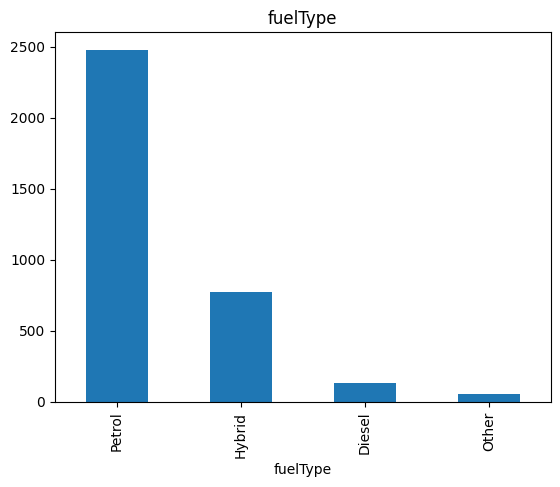

In [25]:
feature = categorical[2]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

melihat histogram masing-masing fitur **numerikal** yaitu year, price, mileage, tax, mpg dan engineSize

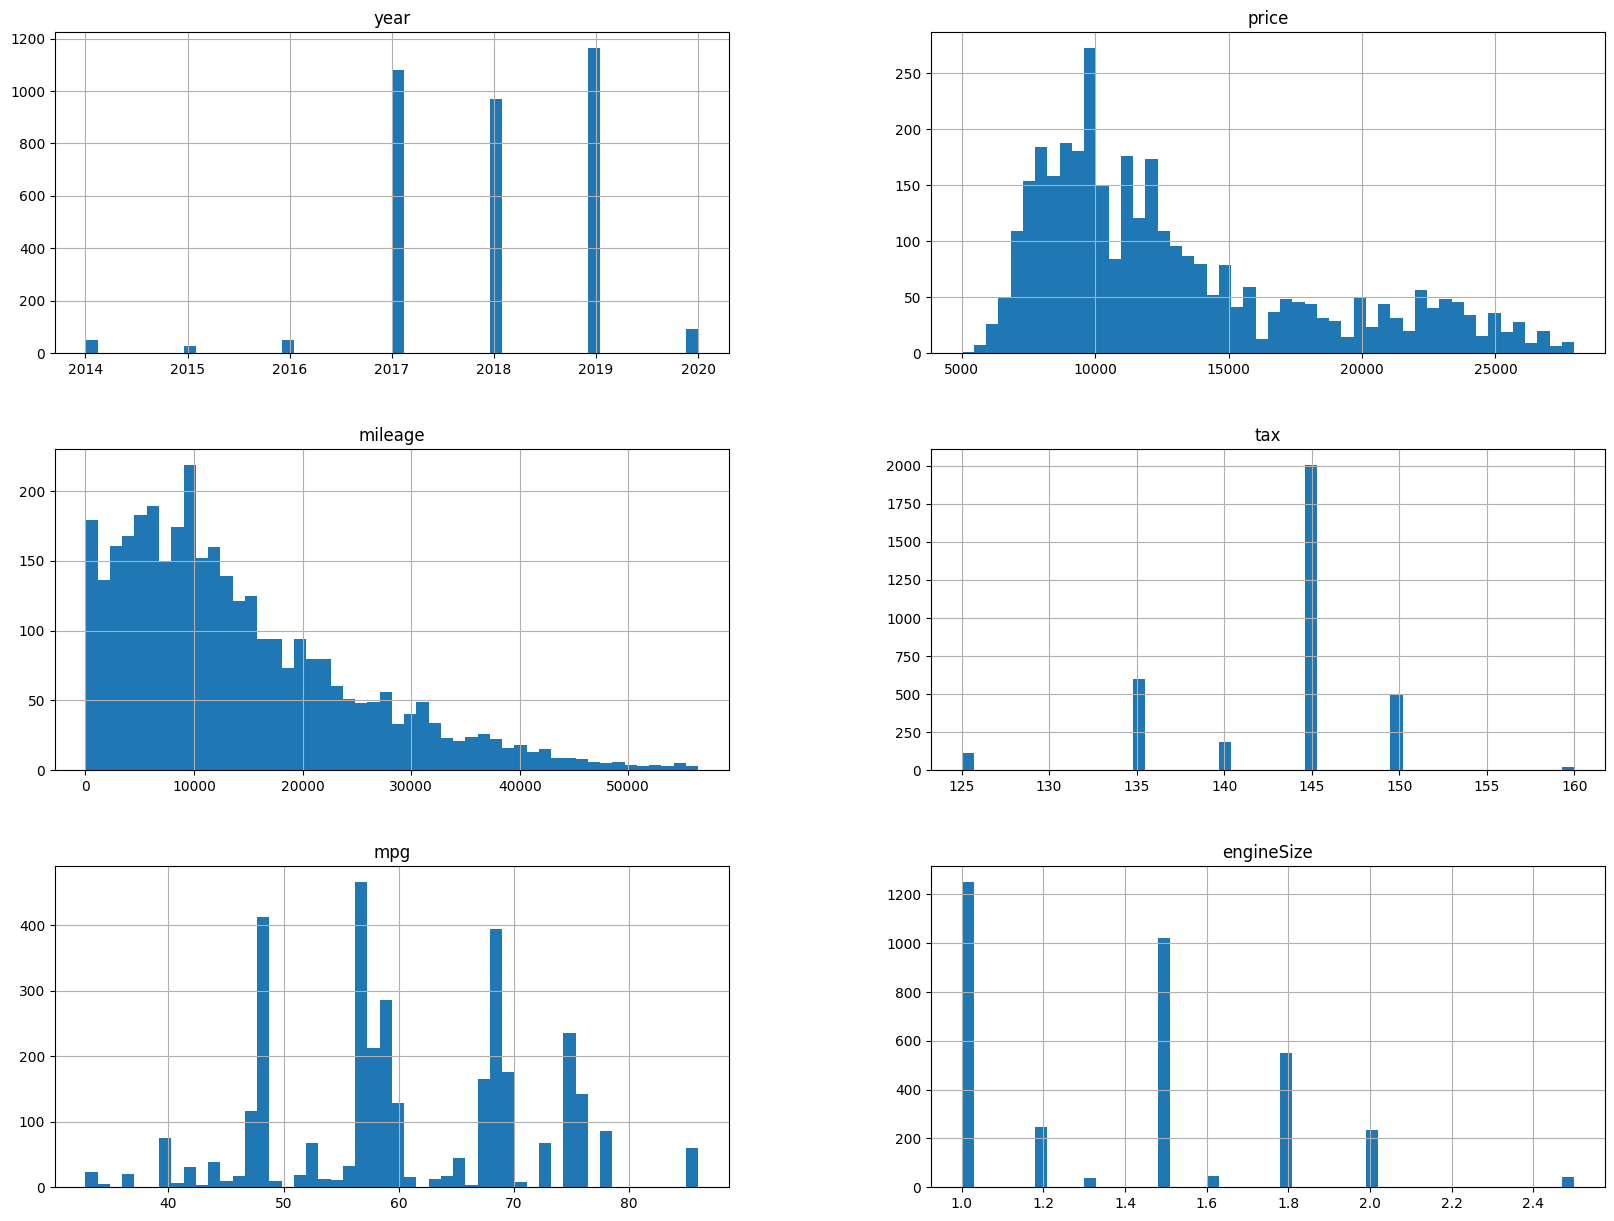

In [26]:
car.hist(bins=50, figsize=(20,15))
plt.show()

* Multivariate Analysis

1. Mengecek rata-rata price terhadap masing-masing fitur untuk mengetahui pengaruh fitur terhadap price

/tmp/ipython-input-31-2233312159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='price', kind='bar', dodge=False, height = 7, aspect= 3, data=car, palette='Set1')
/tmp/ipython-input-31-2233312159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='price', kind='bar', dodge=False, height = 7, aspect= 3, data=car, palette='Set1')
/tmp/ipython-input-31-2233312159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='price', kind='bar', dodge=False, height = 7, aspect= 3, data=car, palette='Set1')


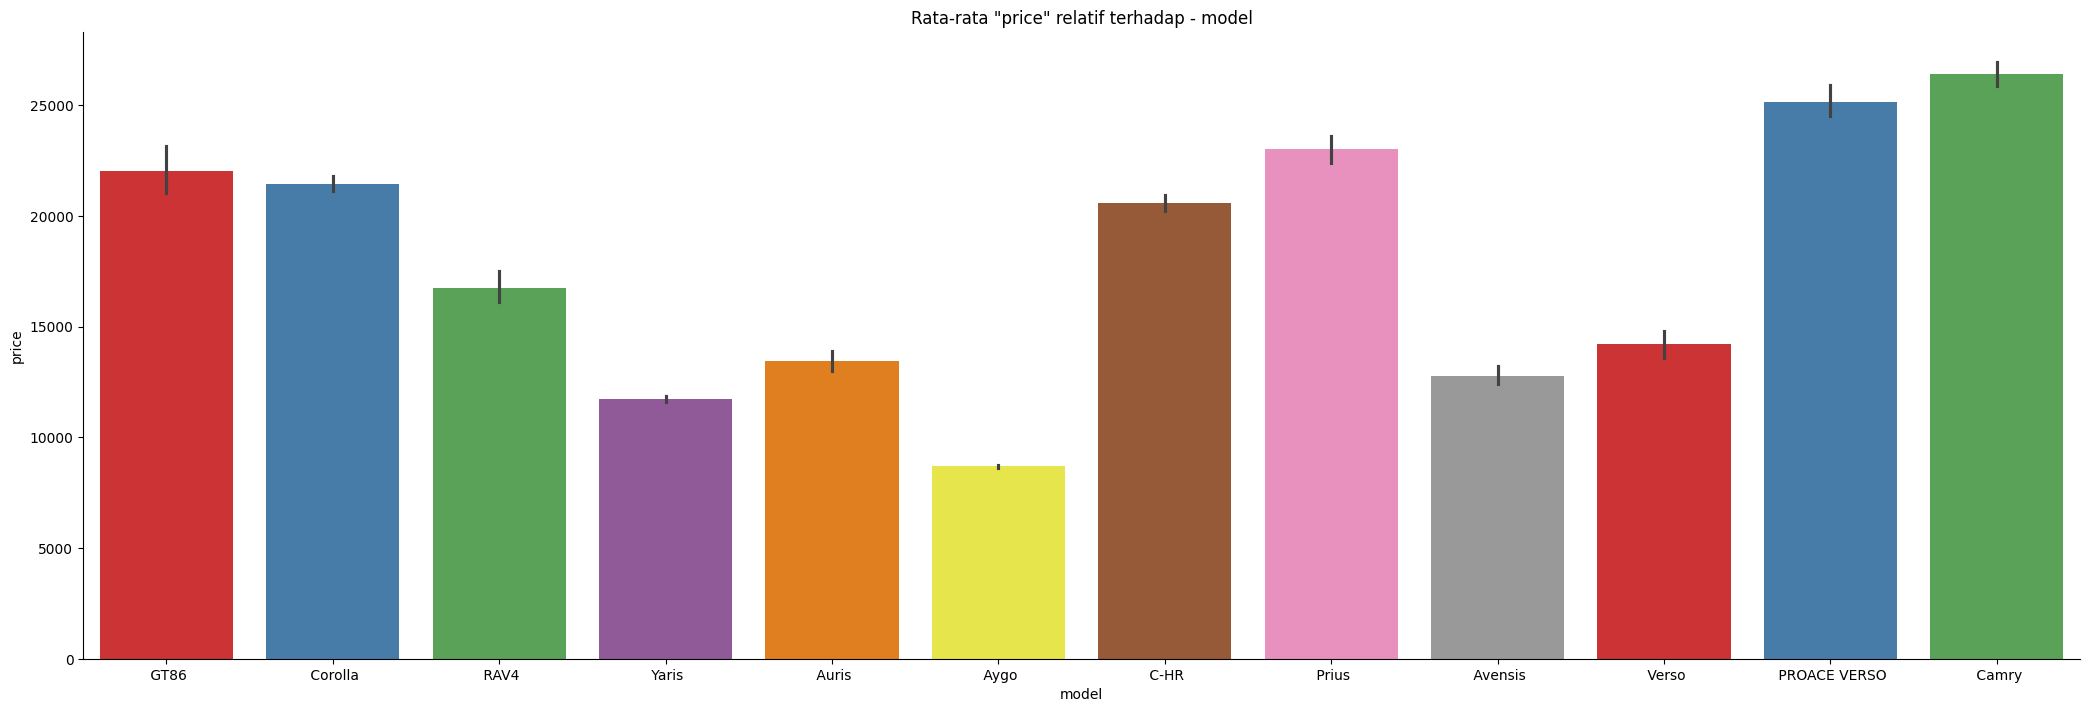

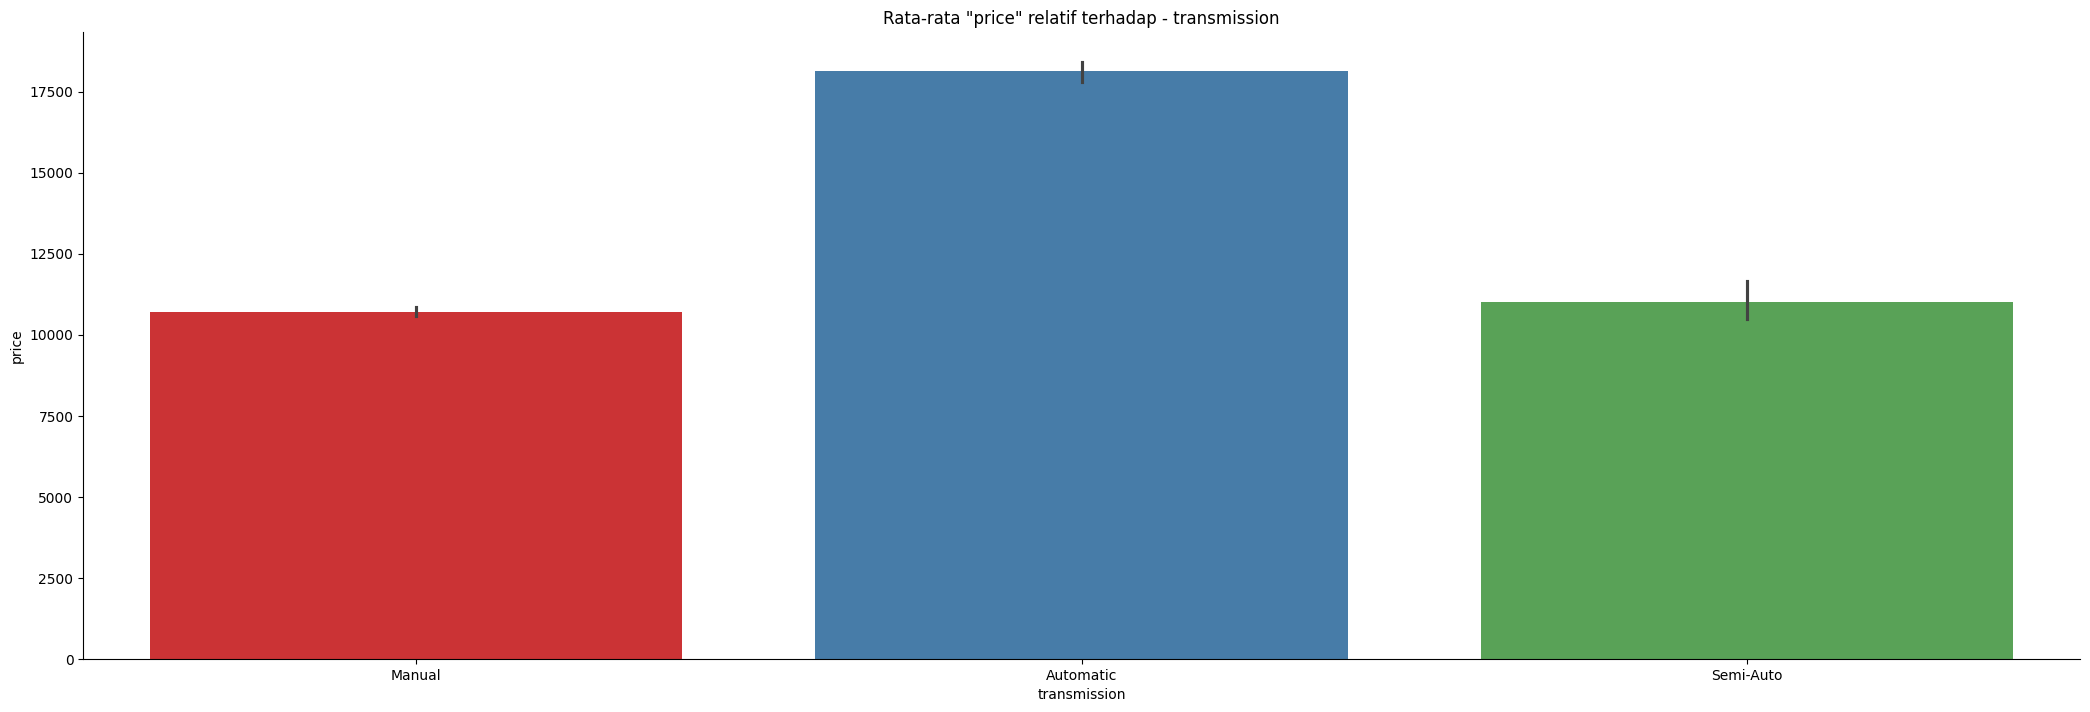

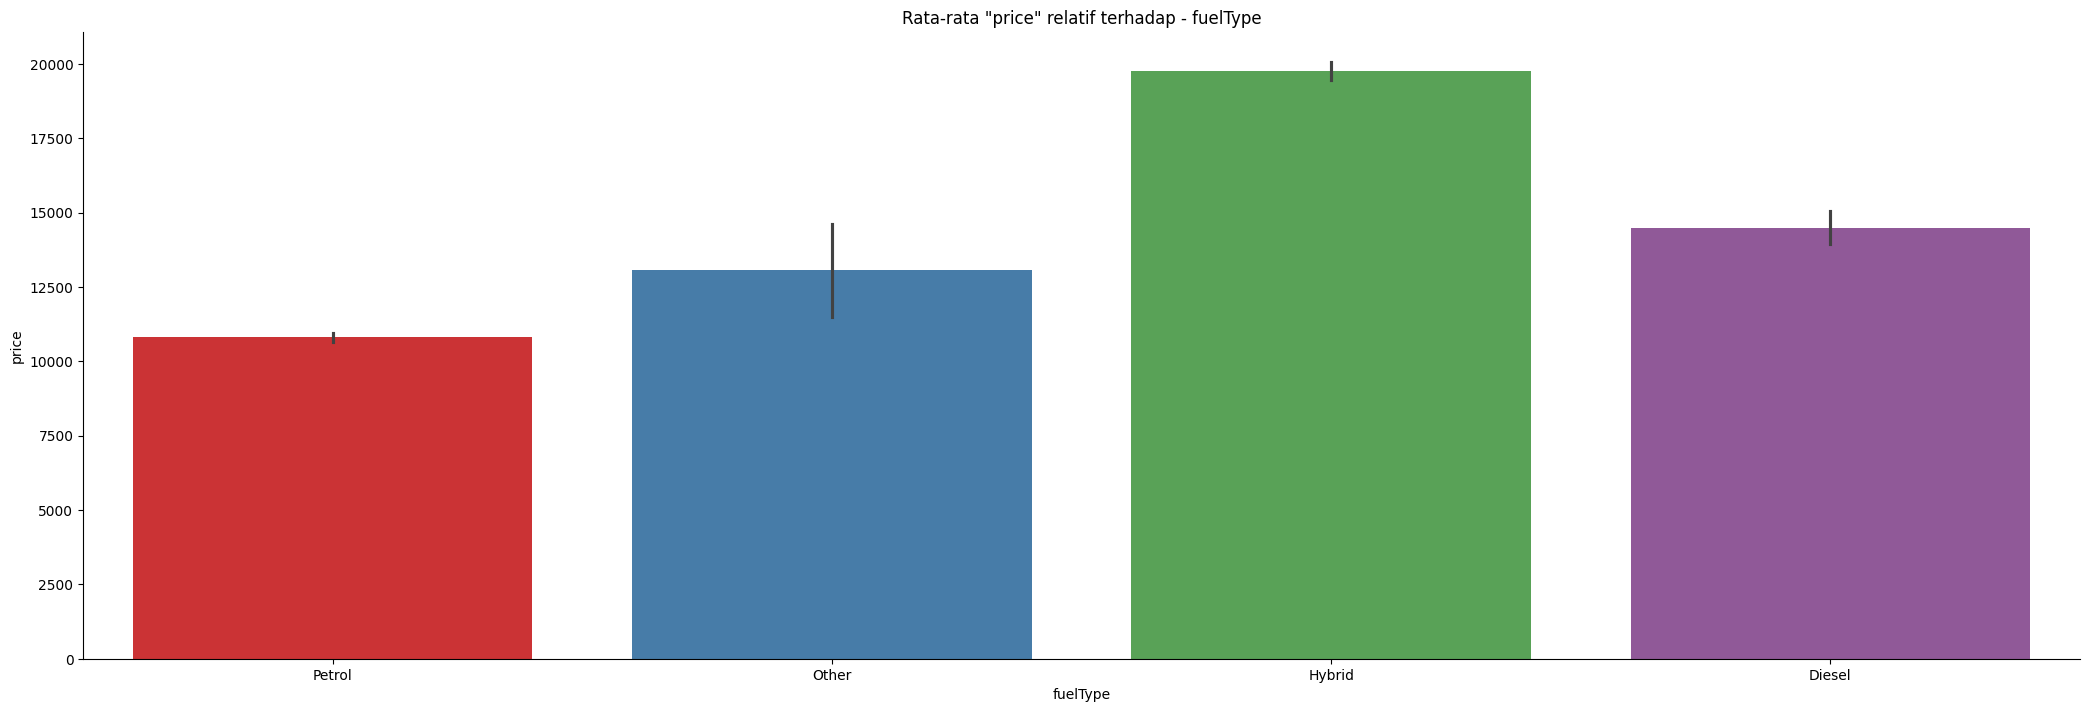

In [31]:
kategori_features = car.select_dtypes(include='object').columns.to_list()
for col in kategori_features:
    sns.catplot(x=col, y='price', kind='bar', dodge=False, height = 7, aspect= 3, data=car, palette='Set1')
    plt.title('Rata-rata "price" relatif terhadap - {}'.format(col))

**insight**

Diagram 1 – Harga vs Model:
Model mobil sangat mempengaruhi harga. Model seperti Canny dan PROACE VERSO memiliki harga tertinggi, sementara Aygo menjadi yang paling terjangkau. Model merupakan indikator kuat dalam menentukan harga mobil.

Diagram 2 – Harga vs Transmisi:
Mobil dengan transmisi Automatic memiliki harga rata-rata lebih tinggi dibanding Manual dan Semi-Auto, menandakan kemungkinan preferensi pengguna atau biaya teknologi yang lebih mahal.

Diagram 3 – Harga vs Jenis Bahan Bakar:
Mobil Hybrid memiliki harga tertinggi, diikuti oleh Diesel dan Petrol. Ini mencerminkan nilai tambah dari teknologi ramah lingkungan dan efisiensi bahan bakar.

***Kesimpulan akhir, fitur kategori memiliki pengaruh yang tinggi terhadap harga.***

2. mengobservasi korelasi antara fitur numerik dalam dataset

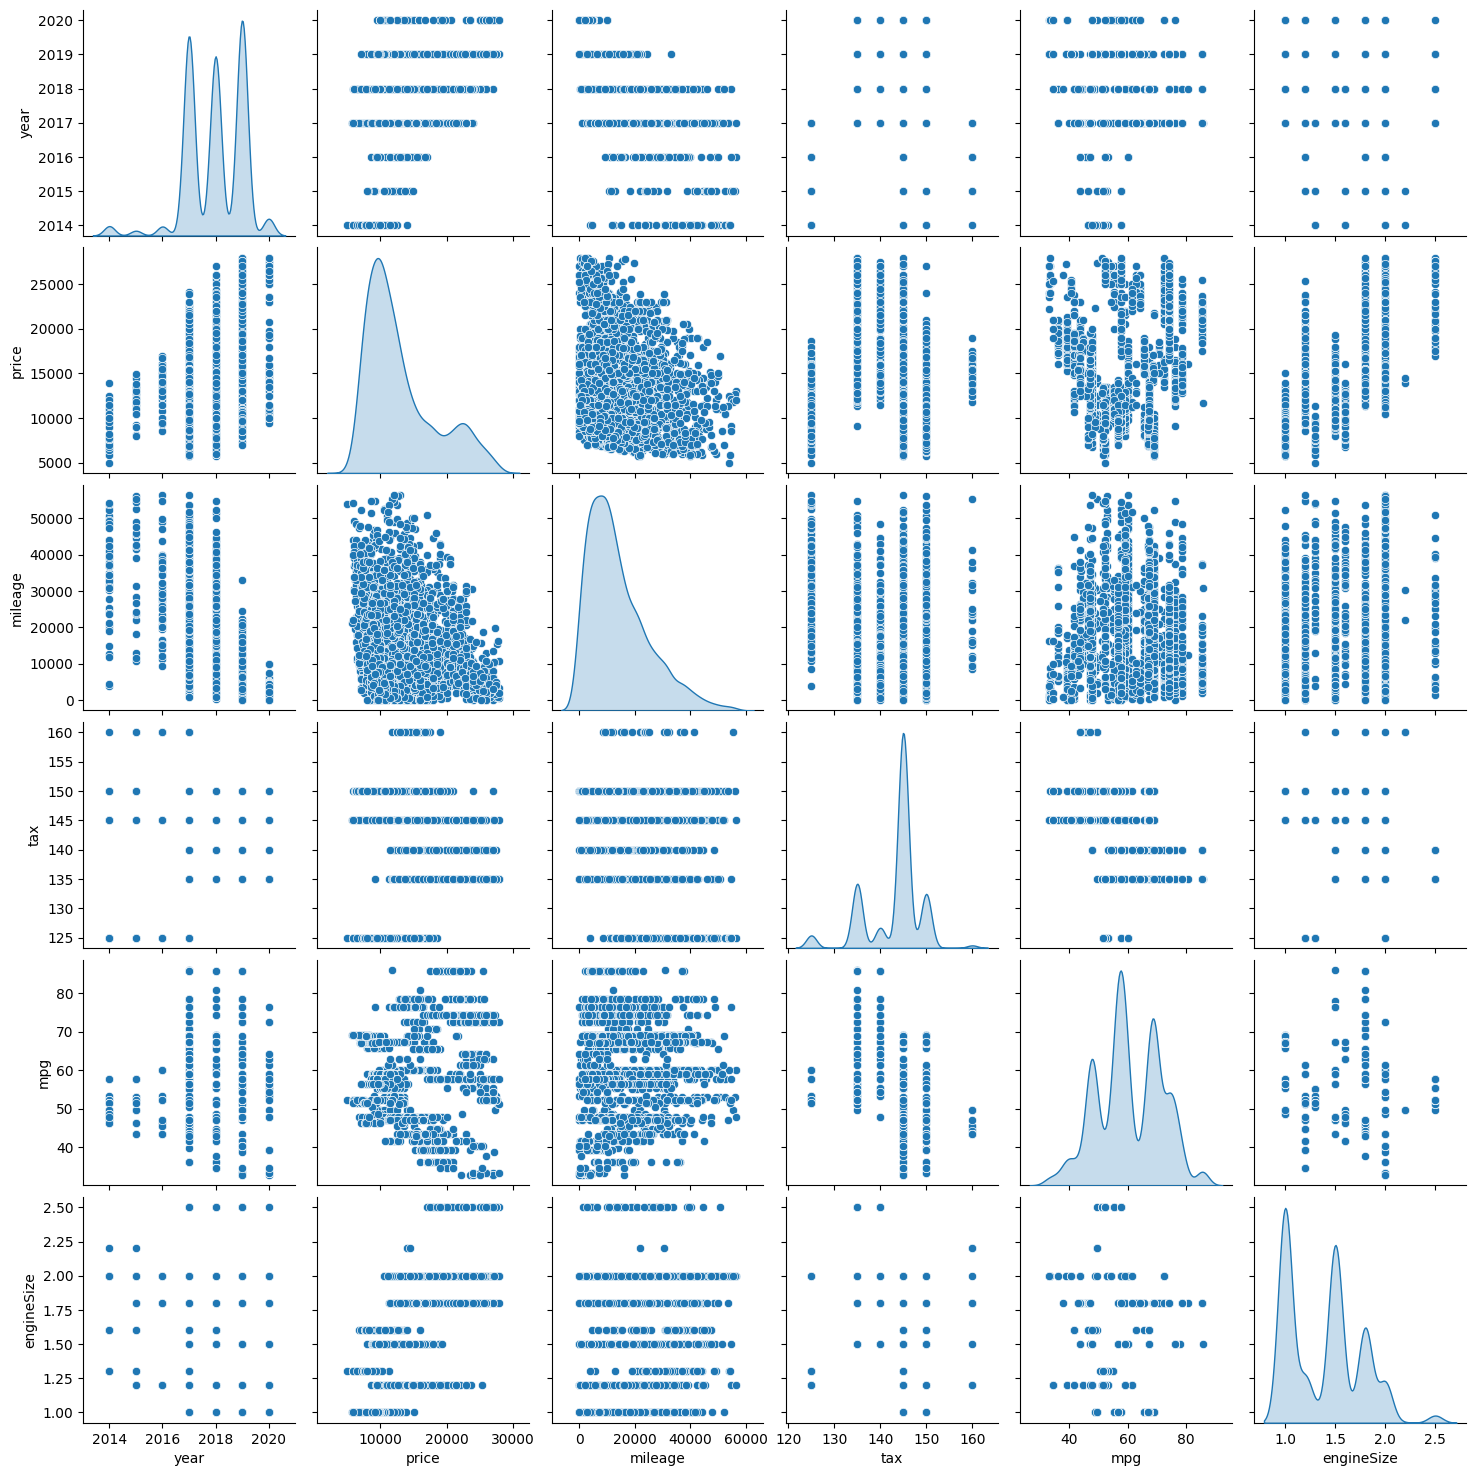

In [32]:
sns.pairplot(car, diag_kind='kde')

**insight**

Harga mobil cenderung lebih tinggi pada mobil yang lebih baru (year) dan lebih rendah jika jarak tempuhnya tinggi (mileage). Dua fitur ini paling kuat memengaruhi harga.

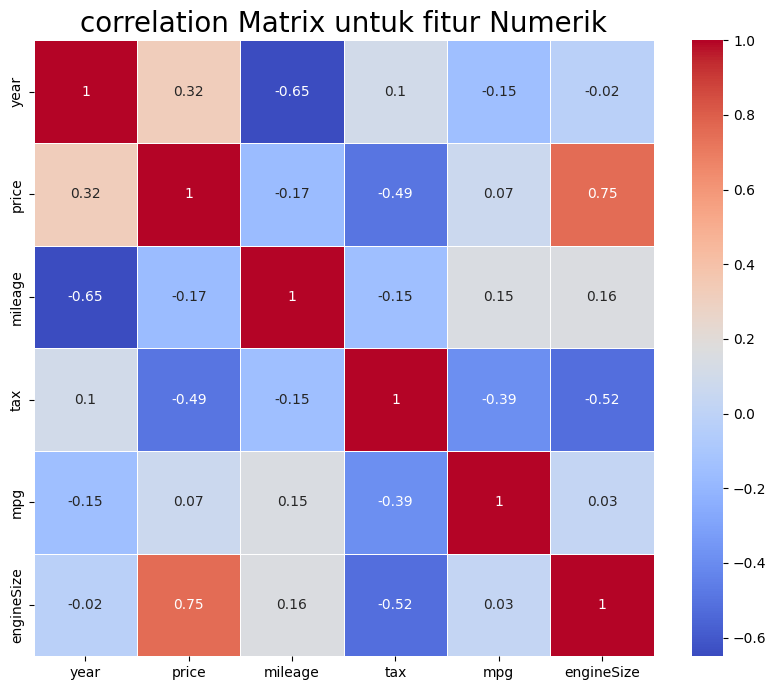

In [34]:
plt.figure(figsize=(10,8))
numeric_car = car.select_dtypes(include=np.number)
correlation_matrics = numeric_car.corr().round(2)

sns.heatmap(data=correlation_matrics, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('correlation Matrix untuk fitur Numerik', size=20)
plt.show()

**insight**

* **engineSize** memiliki korelasi paling kuat dengan price (0.75) → semakin besar ukuran mesin, semakin mahal harga mobil.

* **year** juga berkorelasi positif dengan harga (0.32) → mobil lebih baru cenderung lebih mahal.

* **mileage** berkorelasi negatif kuat dengan year (-0.65) → mobil lama biasanya punya jarak tempuh lebih tinggi.

* Korelasi negatif moderat antara **tax** dan **price** (-0.49) → kemungkinan mobil murah dikenai pajak lebih tinggi pada dataset ini.

**Kesimpulan**:

Harga mobil paling dipengaruhi oleh engineSize, year, dan tax.

# Data Preparation

* Menggunakan oneHotEncoder

In [35]:
car = pd.concat([car, pd.get_dummies(car['model'], prefix='model', drop_first=True)], axis=1)
car = pd.concat([car, pd.get_dummies(car['transmission'], prefix='transmission', drop_first=True)], axis=1)
car = pd.concat([car, pd.get_dummies(car['fuelType'], prefix='fuelType', drop_first=True)], axis=1)
car.drop(['model','transmission','fuelType'], axis=1, inplace=True)
car.head()

,year,price,mileage,tax,mpg,engineSize,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,...,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Verso,model_ Yaris,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
1,2017,15995,18615,145,36.2,2.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,2017,18998,14736,150,36.2,2.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,2017,17498,36284,145,36.2,2.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
6,2017,18522,10456,145,36.2,2.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
7,2017,18995,12340,145,36.2,2.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


* reduksi dimensi PCA

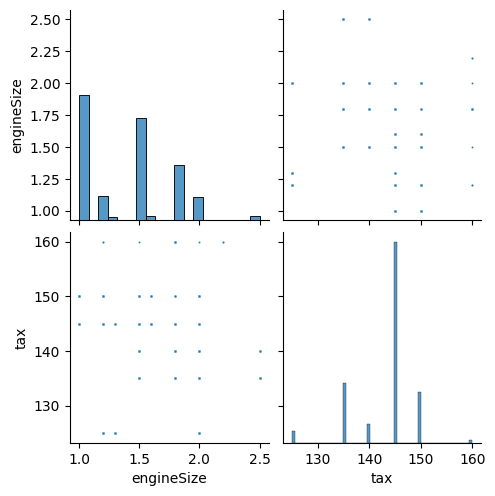

In [36]:
sns.pairplot(car[['engineSize','tax']], plot_kws={'s':2})

* Aplikasikan class PCA

In [37]:
pca = PCA(n_components=2, random_state=123)
pca.fit(car[['engineSize','tax']])
princ_comp = pca.transform(car[['engineSize','tax']])

In [38]:
pca.explained_variance_ratio_.round(3)

array([0.997, 0.003])

In [39]:
# membuat fitur bernama 'fitur'

pca = PCA(n_components=1, random_state=123)
pca.fit(car[['engineSize','tax']])
car['fitur'] = pca.transform(car.loc[:, ('engineSize','tax')]).flatten()
car.drop(['engineSize','tax'], axis=1, inplace=True)

* Data Splitting

In [41]:
# Membagi data latih dan data uji

X = car.drop(['price'], axis=1)
y = car['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3434
Total # of sample in train dataset: 3090
Total # of sample in test dataset: 344


In [42]:
# Standarize

numerik = ['year','fitur']
scaler = StandardScaler()
scaler.fit(X_train[numerik])
X_train[numerik] = scaler.transform(X_train.loc[:, numerik])
X_train[numerik].head()

,year,fitur
4506,0.027505,0.327498
367,-1.840445,-3.080359
3825,-0.906470,1.178103
4612,0.961481,1.178103
5686,-0.906470,0.326411


In [43]:
# mean

X_train[numerik].describe().round(4)

,year,fitur
count,3090.0000,3090.0000
mean,-0.0000,0.0000
std,1.0002,1.0002
min,-3.7084,-3.0804
25%,-0.9065,-0.5275
50%,0.0275,0.3248
75%,0.9615,0.3275
max,1.8955,2.8782


# Model Development

menggunakan gabungan tiga model algoritma yang akan digunakan yaitu K-Nearest Neighbor (KNN), Random Forest, dan Boosting Algorithm. Kemudian, mencari performa yang paling baik dari ketiga algoritma tersebut.

*  menyiapkan dataframe

In [44]:
models = pd.DataFrame(index=['train_mse','test_mse'],
                    columns=['KNN', 'RandomForest', 'Boosting'])

* K-Nearest Neighbors

In [45]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

* boosting Algorithm

In [47]:
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)
X_test.loc[:, numerik] = scaler.transform(X_test[numerik])

/tmp/ipython-input-47-966168979.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.96148061  0.02750542  0.96148061  0.96148061  0.96148061 -1.84044496
  0.02750542  0.96148061  0.96148061  1.8954558  -0.90646977  0.96148061
 -0.90646977  0.02750542  0.96148061 -0.90646977 -0.90646977  0.02750542
  0.02750542 -0.90646977  0.02750542 -0.90646977 -3.70839534  0.02750542
 -0.90646977  0.02750542  0.02750542 -0.90646977  0.96148061  0.96148061
  0.02750542 -0.90646977  0.96148061  0.96148061 -0.90646977  0.02750542
  0.96148061 -0.90646977  0.96148061  0.02750542  0.96148061  0.02750542
 -0.90646977  0.96148061  0.96148061  0.96148061 -0.90646977  0.96148061
 -0.90646977  0.96148061  0.02750542 -0.90646977  0.02750542 -0.90646977
 -0.90646977  0.96148061  0.96148061  1.8954558  -0.90646977 -0.90646977
  0.02750542  0.02750542 -0.90646977  0.96148061 -0.90646977 -0.90646977
  0.02750542  0.96148061 -0.90646977 -1.8

* Random Forest

In [46]:
RF = RandomForestRegressor(n_estimators=45, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

# Evaluasi Model

* Evaluasi ketiga model dengan matrix mse

In [48]:
mse = pd.DataFrame(columns=['train','test'],index=['KNN','RF','boosting'])
model_dict = {'KNN':knn, 'RF':RF, 'boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
mse

,train,test
KNN,23320.966522,26338.592988
RF,229.282765,1218.413395
boosting,3119.260282,2531.050216


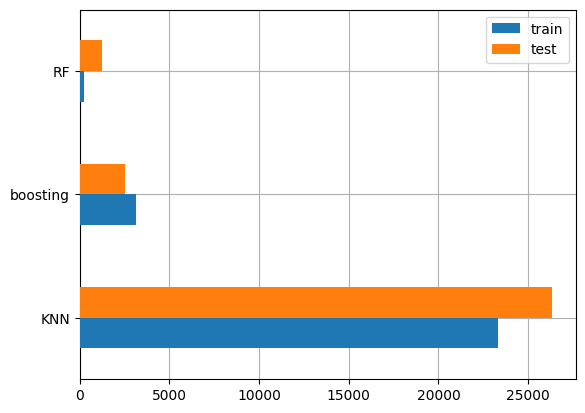

In [50]:
#menampilkan plot metrix dengan bar chart

fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

**insight:**

Dari gambar diatas memperlihatkan bahwa RF memberikan nilai error yang paling kecil. maka model RF dipilih sebagai model terbaik untuk melakukan prediksi harga mobil toyota bekas

#Nilai Akurasi Model

In [54]:
knn_accuracy = knn.score(X_test, y_test)*100
rf_accuracy = RF.score(X_test, y_test)*100
boosting_accuracy = boosting.score(X_test, y_test)*100

In [55]:
list_evaluasi = [[knn_accuracy],
            [rf_accuracy],
            [boosting_accuracy]]
evaluasi = pd.DataFrame(list_evaluasi,
                        columns=['Accuracy (%)'],
                        index=['K-Nearest Neighbor', 'Random Forest', 'Boosting'])
evaluasi


,Accuracy (%)
K-Nearest Neighbor,-13.234741
Random Forest,94.761804
Boosting,89.118522


Dari hasil evaluasi di atas dapat memberikan informasi bahwa model Algorithma Random Forest mencapai akurasi hingga 94% lebih, model Bossting 89% lebih, sedangkan model KNN masih termasuk rendah yakni -13%

# Prediksi

In [57]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_boosting
4846,9450,15950.0,9716.7,10035.7


dapat dilihat dari prediksi di atas bahwa prediki dengan model RF(Rain Forest) memberikan hasil yang paling mendekati nilai y_true dibanding dengan kedua model lainnya.

---------------------------------------------------------------------------------